In [9]:
from dotenv import load_dotenv
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
import humanize
import pandas as pd
import seaborn as sns
import numpy as np
import pymongo
import warnings
import os

In [10]:
sns.set_style("darkgrid")
plt.rcParams['figure.dpi'] = 80
fotmat_tick_humanize = lambda x, pos: humanize.intword(x)

In [11]:
load_dotenv()
warnings.filterwarnings('ignore')

In [12]:
client = pymongo.MongoClient(os.getenv('MONGO_URI'))
db = client[os.getenv('MONGO_DATABASE')]
collection = db['scrapy_bogota_apartments']

df = pd.DataFrame(list(collection.find()))
df = df.drop(columns=['_id'], axis=1)

df.head(3)

,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,...,descripcion,imagenes,website,last_view,datetime,url,timeline,estado,compañia,precio_arriendo
0,3708073,APARTAMENTO,VENTA,371000000.0,58.0,2.0,2.0,166000.0,1.0,GALERIAS,...,"apartamento en venta de 58m2, con vista interi...",[https://d3hzflklh28tts.cloudfront.net/venta-4...,habi.co,2024-01-04 15:17:18.049,2024-01-02 10:11:01.349,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN
1,3923506,CASA CON CONJUNTO CERRADO,VENTA,400000000.0,105.0,3.0,2.0,269100.0,1.0,TOBERIN,...,"casa en venta de 105m2, con vista interior, (i...",[https://d3hzflklh28tts.cloudfront.net/venta-c...,habi.co,2024-01-04 15:17:17.552,2024-01-02 10:11:02.181,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN
2,3652515,APARTAMENTO,VENTA,115000000.0,45.0,2.0,1.0,58800.0,0.0,EL PORVENIR,...,"apartamento en venta de 45m2, con vista exteri...",[https://d3hzflklh28tts.cloudfront.net/venta-4...,habi.co,2024-01-04 15:17:04.076,2024-01-02 10:11:02.343,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN


In [13]:
df.shape

(14239, 26)

In [14]:
df.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'latitud', 'longitud', 'direccion',
       'caracteristicas', 'descripcion', 'imagenes', 'website', 'last_view',
       'datetime', 'url', 'timeline', 'estado', 'compañia', 'precio_arriendo'],
      dtype='object')

In [15]:
df.duplicated(subset=['codigo']).sum()

0

In [16]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [17]:
# sacar solo el mes de datetime
df['month'] = df['datetime'].dt.month
# cambiar el numero del mes por el nombre
df['month_name'] = df['month'].replace({1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 6:'Junio',
                                   7:'Julio', 8:'Agosto', 9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12:'Diciembre'})

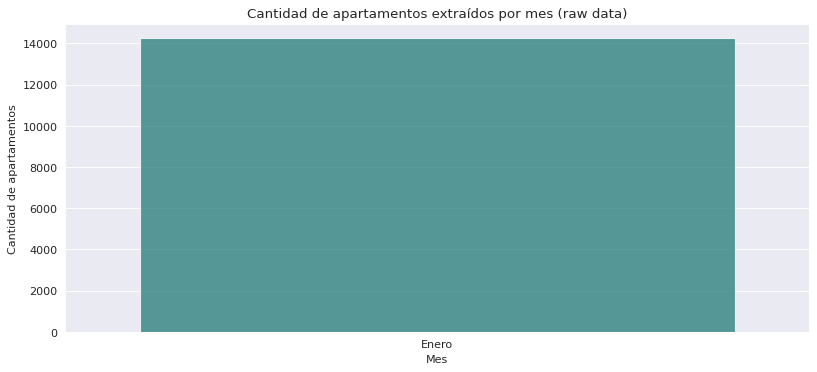

In [18]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='month_name', 
    data=df, 
    palette='viridis',
    alpha=0.8,
    # edgecolor='black',
    # linewidth=.6
)

plt.title('Cantidad de apartamentos extraídos por mes (raw data)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de apartamentos')
plt.show()

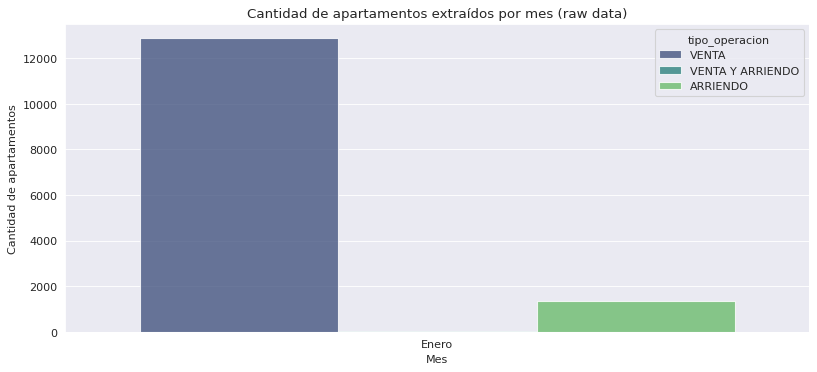

In [19]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='month_name', 
    data=df, 
    palette='viridis',
    alpha=0.8,
    hue='tipo_operacion',
)

plt.title('Cantidad de apartamentos extraídos por mes (raw data)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de apartamentos')
plt.show()

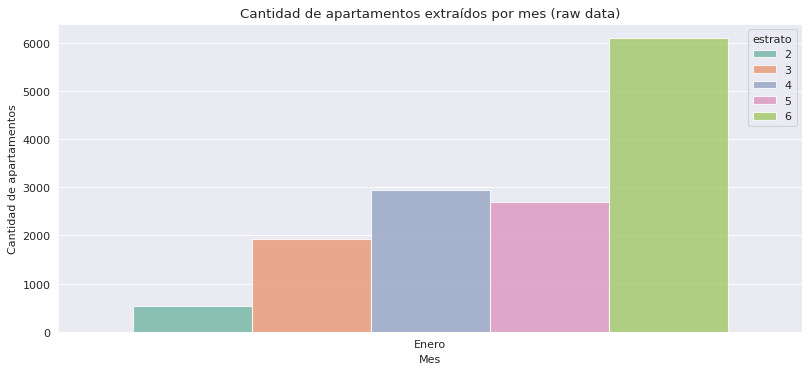

In [20]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='month_name', 
    data=df, 
    palette='Set2',
    alpha=0.8,
    hue='estrato',
    hue_order=[2, 3, 4, 5, 6]
)

plt.title('Cantidad de apartamentos extraídos por mes (raw data)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de apartamentos')
plt.show()

In [21]:
df['tipo_operacion'].value_counts()

tipo_operacion
VENTA               12861
ARRIENDO             1333
VENTA Y ARRIENDO       45
Name: count, dtype: int64

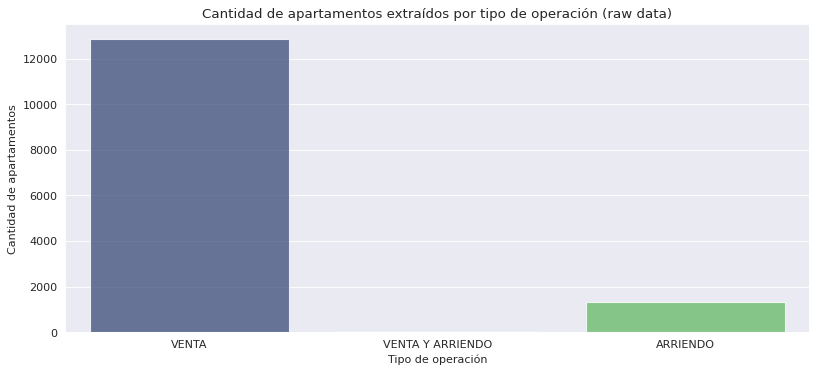

In [22]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='tipo_operacion', 
    data=df, 
    palette='viridis',
    alpha=0.8,
)

plt.title('Cantidad de apartamentos extraídos por tipo de operación (raw data)')
plt.xlabel('Tipo de operación')
plt.ylabel('Cantidad de apartamentos')
plt.show()

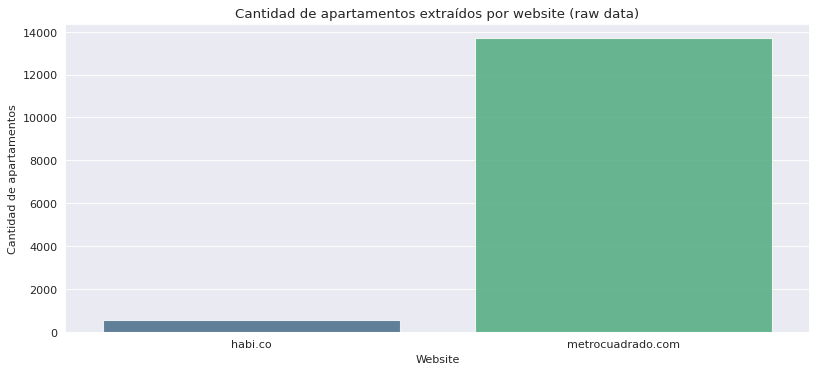

In [23]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='website', 
    data=df, 
    palette='viridis',
    alpha=0.8,
)

plt.title('Cantidad de apartamentos extraídos por website (raw data)')
plt.xlabel('Website')
plt.ylabel('Cantidad de apartamentos')
plt.show()

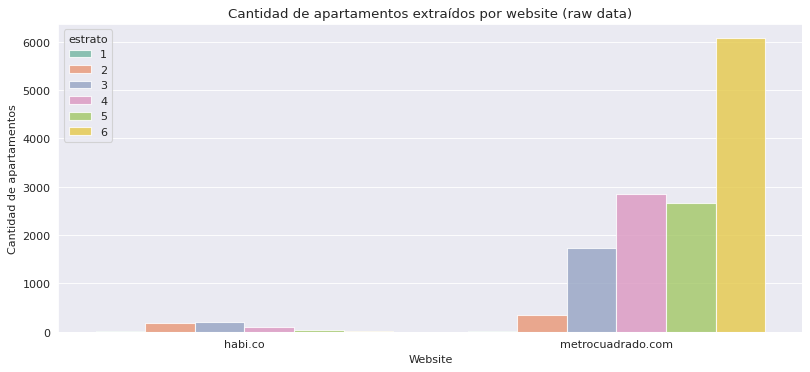

In [24]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='website', 
    data=df, 
    palette='Set2',
    alpha=0.8,
    hue='estrato',
    hue_order=[1, 2, 3, 4, 5, 6]
)

plt.title('Cantidad de apartamentos extraídos por website (raw data)')
plt.xlabel('Website')
plt.ylabel('Cantidad de apartamentos')
plt.show()